In [13]:
import os
import numpy as np
import pandas as pd
import pickle

import seaborn as sns
import sklearn
from sklearn.utils import Bunch

from efaar_benchmarking.benchmarking import benchmark as bm
from efaar_benchmarking.utils import get_benchmark_metrics

# This is necesary for the svg output plots to have editable text
plt.rcParams['svg.fonttype'] = 'none'

# Just to make the notebook take up full screen real estate, not necessary
from IPython.display import display, HTML
display(HTML("<style>.container { width:80% !important; }</style>"))

# Load JUMP cpg0016 data

cpg0016 data loading and PCA transforming is shown in `cpg0016_loading.ipynb`. This code assumes that has already been run to create a directory `scratch` in the high-level `proxbias` directory and populate it with `cpg_data_dict.pkl`.

In [3]:
with open("../../scratch/cpg_data_dict.pkl",'rb') as infile:
    data_dict = pickle.load(infile)
data_dict.keys()

dict_keys(['JUMP-CP PCAW', 'JUMP-CP PCAW Arm-Centered'])

# Run Known Biology Benchmarks
Run known biology benchmark metrics for the Reactome, CORUM and HuMAP annotations sets. 

In [7]:
results = []
for k, v in data_dict.items():
    result = get_benchmark_metrics(bm(v, pert_label_col="gene"))
    result['map'] = k
    results.append(result)
results = pd.concat(results)

7825 gene perturbations in the map.
Running benchmarking for Reactome
Entity type 1 count in the map is 7825.
Entity type 2 count in the map is 7825.
Took the overlap between the annotation source and the map entities.
Entity type 1 count in the map is 1828.
Entity type 2 count in the map is 1758.
Running benchmarking for HuMAP
Entity type 1 count in the map is 7825.
Entity type 2 count in the map is 7825.
Took the overlap between the annotation source and the map entities.
Entity type 1 count in the map is 3476.
Entity type 2 count in the map is 3476.
Running benchmarking for CORUM
Entity type 1 count in the map is 7825.
Entity type 2 count in the map is 7825.
Took the overlap between the annotation source and the map entities.
Entity type 1 count in the map is 1861.
Entity type 2 count in the map is 1861.
Running benchmarking for Reactome
Entity type 1 count in the map is 7825.
Entity type 2 count in the map is 7825.
Took the overlap between the annotation source and the map entities

In [8]:
results

,source,recall,map
0,Reactome,0.133333,JUMP-CP PCAW
1,HuMAP,0.189173,JUMP-CP PCAW
2,CORUM,0.223281,JUMP-CP PCAW
0,Reactome,0.129673,JUMP-CP PCAW Arm-Centered
1,HuMAP,0.189786,JUMP-CP PCAW Arm-Centered
2,CORUM,0.224909,JUMP-CP PCAW Arm-Centered


<Axes: xlabel='source', ylabel='recall'>

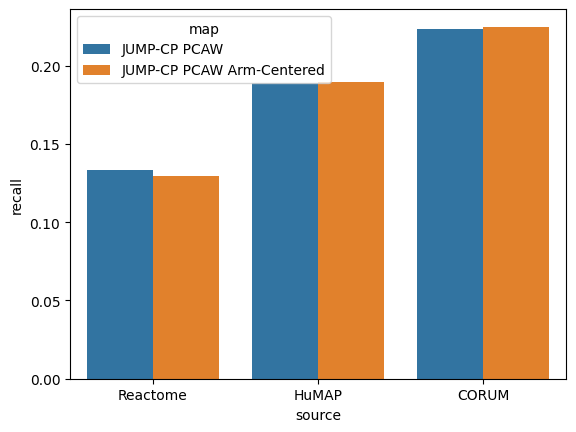

In [12]:
sns.barplot(data=results, x='source' ,y='recall', hue='map')